# Week 7& 8 - Project Milestone3 (Koppula Veera Reddy)

In [1]:
#Load the necessary libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from bs4 import BeautifulSoup
import requests

In [2]:
#Loading URL 
url='https://www.worldometers.info/coronavirus/country/us/'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)

In [3]:
#Validating that the URL is captured
page

<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>United States COVID: 46,304,560 Cases and 756,316 Deaths - Worldometer</title>\n<meta name="description" content="United States Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline.">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n<link rel="apple-touch
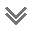

In [4]:
#plain text rendring of page
page.text

In [5]:
#Rendering html vis BS
soup = BeautifulSoup(page.text, 'html.parser')

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   United States COVID: 46,304,560 Cases and 756,316 Deaths - Worldometer
  </title>
  <meta content="United States Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <lin
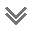

In [6]:
#Pretty Print validation
print(soup.prettify())

In [7]:
#Stripping all tables
all_tables = soup.find_all("table")

In [8]:
#Stripping specific table needed and validating that the type is a tag
data_table = soup.find("table", {"id": "usa_table_countries_today"})
print(type(data_table))

<class 'bs4.element.Tag'>


In [9]:
data_header = data_table.thead.findAll('tr', recursive=False)[0].findAll('th', recursive=False)

In [10]:
data_header

[<th width="1%">#</th>,
 <th width="100">USA<br>State</br></th>,
 <th width="20">Total<br>Cases</br></th>,
 <th width="30">New<br/>Cases</th>,
 <th width="30">Total<br/>Deaths</th>,
 <th width="30">New<br/>Deaths</th>,
 <th width="30">Total<br/>Recovered</th>,
 <th width="30">Active<br/>Cases</th>,
 <th width="30">Tot Cases/<br/>1M pop</th>,
 <th width="30">Deaths/<br/>1M pop</th>,
 <th width="30">Total<br/>Tests</th>,
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>,
 <th width="30">Population</th>,
 <th width="30">Source</th>,
 <th width="30">Projections</th>]

In [11]:
#Extracting headers for columns
data_headers = [th.get_text().strip() for th in data_header]

In [12]:
#print validation of headers
data_headers

['#',
 'USAState',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'ActiveCases',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop',
 'Population',
 'Source',
 'Projections']

In [13]:
#Extracting all rows
data_rows = data_table.tbody.findAll('tr')[1:]

In [14]:
#Cleaning rows to get the data
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in data_rows]

In [15]:
#load of data and headers into a data frame
df1 = pd.DataFrame(data_rows1, columns=data_headers)

In [16]:
#print validation looks good
df1.head()

,#,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population,Source,Projections
0,1,California,"4,757,672",,"71,544",,"2,530,325","2,155,803","120,410","1,811","99,679,827","2,522,759","39,512,223",[view by county] [1],[projections]
1,2,Texas,"4,210,177","+1,040","70,720",+71,"4,016,414","123,043","145,199","2,439","44,609,161","1,538,465","28,995,881",[view by county] [1] [2] [3],[projections]
2,3,Florida,"3,681,830",,"58,608",,"3,089,778","533,444","171,425","2,729","41,292,510","1,922,573","21,477,737",[view by county] [1] [2] [3] [4],[projections]
3,4,New York,"2,611,075",,"56,732",,"2,170,702","383,641","134,221","2,916","74,538,052","3,831,589","19,453,561",[view by county] [1] [2] [3],[projections]
4,5,Illinois,"1,680,908",,"28,414",,"1,566,181","86,313","132,649","2,242","34,492,598","2,721,992","12,671,821",[1] [2] [3] [4] [5],[projections]


In [17]:
for col in df1.columns:
    print(col)

#
USAState
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop
Population
Source
Projections


**Replace Headers**

In [18]:
#Replacing headers
df1.rename(columns={"#": "ID", "USAState": "StateName","Tests/\n1M pop":"Tests/1M pop"}, inplace=True)

In [19]:
df1.head()

,ID,StateName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Source,Projections
0,1,California,"4,757,672",,"71,544",,"2,530,325","2,155,803","120,410","1,811","99,679,827","2,522,759","39,512,223",[view by county] [1],[projections]
1,2,Texas,"4,210,177","+1,040","70,720",+71,"4,016,414","123,043","145,199","2,439","44,609,161","1,538,465","28,995,881",[view by county] [1] [2] [3],[projections]
2,3,Florida,"3,681,830",,"58,608",,"3,089,778","533,444","171,425","2,729","41,292,510","1,922,573","21,477,737",[view by county] [1] [2] [3] [4],[projections]
3,4,New York,"2,611,075",,"56,732",,"2,170,702","383,641","134,221","2,916","74,538,052","3,831,589","19,453,561",[view by county] [1] [2] [3],[projections]
4,5,Illinois,"1,680,908",,"28,414",,"1,566,181","86,313","132,649","2,242","34,492,598","2,721,992","12,671,821",[1] [2] [3] [4] [5],[projections]


**Format data into a more readable format**

In [20]:
#dropping columns with values that are not readable and enhancing view to fit in single pane
df_state_data=df1.drop(columns=['Source', 'Projections'])

In [21]:
df_state_data.head()

,ID,StateName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,1,California,"4,757,672",,"71,544",,"2,530,325","2,155,803","120,410","1,811","99,679,827","2,522,759","39,512,223"
1,2,Texas,"4,210,177","+1,040","70,720",+71,"4,016,414","123,043","145,199","2,439","44,609,161","1,538,465","28,995,881"
2,3,Florida,"3,681,830",,"58,608",,"3,089,778","533,444","171,425","2,729","41,292,510","1,922,573","21,477,737"
3,4,New York,"2,611,075",,"56,732",,"2,170,702","383,641","134,221","2,916","74,538,052","3,831,589","19,453,561"
4,5,Illinois,"1,680,908",,"28,414",,"1,566,181","86,313","132,649","2,242","34,492,598","2,721,992","12,671,821"


**Fix Fix casing or inconsistent values**
fill empty cells with 0s

In [22]:
#Replacing empty cells with NaN and then replcing by 0 for readability
df_state_data = df_state_data.replace(r'^\s*$', np.NaN, regex=True)
df_state_data.fillna(0, inplace=True)

In [23]:
df_state_data

,ID,StateName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,1,California,"4,757,672",0,"71,544",0,"2,530,325","2,155,803","120,410","1,811","99,679,827","2,522,759","39,512,223"
1,2,Texas,"4,210,177","+1,040","70,720",+71,"4,016,414","123,043","145,199","2,439","44,609,161","1,538,465","28,995,881"
2,3,Florida,"3,681,830",0,"58,608",0,"3,089,778","533,444","171,425","2,729","41,292,510","1,922,573","21,477,737"
3,4,New York,"2,611,075",0,"56,732",0,"2,170,702","383,641","134,221","2,916","74,538,052","3,831,589","19,453,561"
4,5,Illinois,"1,680,908",0,"28,414",0,"1,566,181","86,313","132,649","2,242","34,492,598","2,721,992","12,671,821"
5,6,Georgia,"1,625,399",0,"28,519",0,"1,153,694","443,186","153,088","2,686","16,459,826","1,550,266","10,617,423"
6,7,Pennsylvania,"1,538,296","+3,414","31,023",+7,"1,396,742","110,531","120,161","2,423","18,298,402","1,429,341","12,801,989"
7,8,Ohio,"1,521,844","+2,540","23,955",0,"1,413,599","84,290","130,193","2,049","17,053,825","1,458,951","11,689,100"
8,9,North Carolina,"1,463,410",0,"17,765",0,"1,399,393","46,252","139,531","1,694","18,831,999","1,795,561","10,488,084"
9,10,Tennessee,"1,272,558",0,"16,158",0,"1,238,709","17,691","186,341","2,366","10,230,166","1,498,009","6,829,174"


**Find duplicates**

In [24]:
df_state_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

As this is data frame consists one indiviual row per state & district of columbia - no duplicates are expected

**Identify outliers and bad data**

In [25]:
# Replaing non reported data N/A to Null so that it will be easier to merge in Milestone5
df_state_data = df_state_data.replace('N/A', np.NaN, regex=True)

In [26]:
df_state_data

,ID,StateName,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,1,California,"4,757,672",0,"71,544",0,"2,530,325","2,155,803","120,410","1,811","99,679,827","2,522,759","39,512,223"
1,2,Texas,"4,210,177","+1,040","70,720",+71,"4,016,414","123,043","145,199","2,439","44,609,161","1,538,465","28,995,881"
2,3,Florida,"3,681,830",0,"58,608",0,"3,089,778","533,444","171,425","2,729","41,292,510","1,922,573","21,477,737"
3,4,New York,"2,611,075",0,"56,732",0,"2,170,702","383,641","134,221","2,916","74,538,052","3,831,589","19,453,561"
4,5,Illinois,"1,680,908",0,"28,414",0,"1,566,181","86,313","132,649","2,242","34,492,598","2,721,992","12,671,821"
5,6,Georgia,"1,625,399",0,"28,519",0,"1,153,694","443,186","153,088","2,686","16,459,826","1,550,266","10,617,423"
6,7,Pennsylvania,"1,538,296","+3,414","31,023",+7,"1,396,742","110,531","120,161","2,423","18,298,402","1,429,341","12,801,989"
7,8,Ohio,"1,521,844","+2,540","23,955",0,"1,413,599","84,290","130,193","2,049","17,053,825","1,458,951","11,689,100"
8,9,North Carolina,"1,463,410",0,"17,765",0,"1,399,393","46,252","139,531","1,694","18,831,999","1,795,561","10,488,084"
9,10,Tennessee,"1,272,558",0,"16,158",0,"1,238,709","17,691","186,341","2,366","10,230,166","1,498,009","6,829,174"
